In [2]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
from skimage.io import imread, imshow
import pickle
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize,StandardScaler

import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.autograd import Variable
from PIL import Image

#Directory and Categories for classification


categories=['buildings','forest','glacier','mountain','sea','street']
target_names = ['buildings','forest','glacier','mountain','sea','street']

#Opening feature pickle files

pick_in=open('denseNet161_intel_train.pickle','rb')
data1=pickle.load(pick_in)
pick_in.close()

pick_in=open('denseNet161_intel_test.pickle','rb')
data2=pickle.load(pick_in)
pick_in.close()



#Splitting Data into features and labels and normalizing data
#random.Random(42).shuffle(data1)
#random.shuffle(data2)
features_train=[]

labels_train=[]
features_test=[]

labels_test=[]
for feature,label in data1:
	features_train.append(feature)
	labels_train.append(label)

for feature,label in data2:
  features_test.append(feature)
  labels_test.append(label)

print(len(features_train[0]))
print(len(features_test[0]))

print(len(labels_train))
print(len(labels_test))


df1=pd.DataFrame(features_train)
df2=pd.DataFrame(features_test)
nor1=normalize(df1)
nor2=normalize(df2)
xtrain=pd.DataFrame(nor1)
xtest=pd.DataFrame(nor2)
#Removing zero value columns
xtrain = xtrain.loc[:, (xtrain != 0).any(axis=0)]
xtest = xtest.loc[:, (xtest != 0).any(axis=0)]
ytrain=labels_train
ytest=labels_test
'''
from sklearn.feature_selection import SelectPercentile as SP
selector1 = SP(percentile=50) # select features with top 50% MI scores

selector1.fit(norm1,labels)
X = selector1.transform(norm1)
'''
'''
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
norm=pca.fit_transform(norm1)

#xtrain,xtest, ytrain,ytest=train_test_split(norm,labels,test_size=0.2,random_state=42)
xtrain,xtest, ytrain,ytest=train_test_split(norm,labels,test_size=0.25,random_state=42)
accuracies={}
mean_accuracies={}
'''
##########################################################################################################################################################################
#SVC 

#import time
#start=time.time()
from sklearn.svm import SVC
model=SVC(C=1,kernel='linear',gamma='auto')
model.fit(xtrain,ytrain)
svc_prediction=model.predict(xtest)
accuracy1=model.score(xtest,ytest)
accuracy_train1=model.score(xtrain,ytrain)

print('Training accuracy', accuracy_train1)

print('Test Accuracy',accuracy1)
print('Prediction is: ',categories[svc_prediction[0]])
cm=confusion_matrix(ytest,svc_prediction)
print(cm)


2208
2208
14034
3000
Training accuracy 0.9476271911073109
Test Accuracy 0.9316666666666666
Prediction is:  buildings
[[404   0   0   0   2  31]
 [  0 474   0   0   0   0]
 [  1   2 475  61  13   1]
 [  0   1  52 462   8   2]
 [  0   1   3   1 505   0]
 [ 25   0   0   1   0 475]]


In [4]:
features_train=[]

labels_train=[]
features_test=[]

labels_test=[]
for feature,label in data1:
    features_train.append(feature)
    labels_train.append(label)

for feature,label in data2:
    features_test.append(feature)
    labels_test.append(label)



pick_in=open('hog_train.pickle','rb')
data3=pickle.load(pick_in)
pick_in.close()

pick_in=open('hog_test.pickle','rb')
data4=pickle.load(pick_in)
pick_in.close()


features_hog_train=[]
features_hog_test=[]



for feature,label in data3:
	features_hog_train.append(feature)


for feature,label in data4:
	features_hog_test.append(feature)


print(len(features_train[0]))
print(len(features_test[0]))
print(len(labels_train))
print(len(labels_test))

print(len(features_hog_train[0]))
print(len(features_hog_test[0]))

hog_train=np.array(features_hog_train,dtype=float)
hog_test=np.array(features_hog_test,dtype=float)

feat_train=np.array(features_train,dtype=float)
feat_test=np.array(features_test,dtype=float)

final_train=np.concatenate((hog_train,feat_train),axis=1)
final_test=np.concatenate((hog_test,feat_test),axis=1)


df_train=pd.DataFrame(final_train)

df_test=pd.DataFrame(final_test)


nor1=normalize(df_train)
nor2=normalize(df_test)

df1=pd.DataFrame(nor1)
df1['labels']=labels_train
df2=pd.DataFrame(nor2)
df2['labels']=labels_test

print(df1.head())
print(df2.head())
shuffled1 = df1.sample(frac=1).reset_index()
shuffled1.drop(shuffled1.columns[0],axis=1,inplace=True)
print(shuffled1.head())
ytrain=shuffled1.iloc[:,-1]
print(ytrain.head())
xtrain=shuffled1.drop(shuffled1.columns[-1],axis=1)
print(xtrain.head())

shuffled2 = df2.sample(frac=1).reset_index()
shuffled2.drop(shuffled2.columns[0],axis=1,inplace=True)
print(shuffled2.head())
ytest=shuffled2.iloc[:,-1]
print(ytest.head())
xtest=shuffled2.drop(shuffled2.columns[-1],axis=1)
print(xtest.head())



2208
2208
14034
3000
3780
3780
          0         1         2         3         4         5         6  \
0  0.009778  0.008460  0.008435  0.005366  0.009778  0.003334  0.002109   
1  0.001602  0.000242  0.000959  0.005173  0.008358  0.007192  0.008849   
2  0.007319  0.000312  0.000026  0.000178  0.002721  0.003581  0.000576   
3  0.011592  0.011592  0.001243  0.000293  0.000839  0.001198  0.000332   
4  0.001245  0.000805  0.000259  0.000125  0.001935  0.000850  0.001380   

          7         8         9  ...      5979      5980      5981      5982  \
0  0.003334  0.001572  0.009778  ...  0.008808  0.065487  0.008608  0.000481   
1  0.000808  0.000390  0.002324  ...  0.038521  0.090895  0.028647  0.032996   
2  0.003291  0.000551  0.002658  ...  0.018707  0.104854  0.004954  0.006493   
3  0.000548  0.003492  0.011592  ...  0.036701  0.033804  0.024569  0.003723   
4  0.000569  0.000578  0.003363  ...  0.028575  0.053731  0.030777  0.000172   

       5983      5984      5985      

In [6]:
from sklearn.decomposition import PCA

In [7]:
a=xtrain
b=xtest

In [8]:
a.shape

(14034, 5988)

In [9]:
b.shape

(3000, 5988)

In [10]:
pca1=PCA(n_components=0.95)
pca1.fit(a)

PCA(n_components=0.95)

In [14]:
ax=pca1.transform(a)

In [15]:
ax.shape

(14034, 799)

In [16]:
bx=pca1.transform(b)

In [17]:
bx.shape

(3000, 799)

In [18]:
from sklearn.svm import SVC
model=SVC(C=1,kernel='linear',gamma='auto')
model.fit(ax,ytrain)
svc_prediction=model.predict(bx)
accuracy1=model.score(bx,ytest)
accuracy_train1=model.score(ax,ytrain)

print('Training accuracy', accuracy_train1)

print('Test Accuracy',accuracy1)
print('Prediction is: ',categories[svc_prediction[0]])
cm=confusion_matrix(ytest,svc_prediction)
print(cm)


Training accuracy 0.9481259797634317
Test Accuracy 0.9326666666666666
Prediction is:  forest
[[402   0   0   0   2  33]
 [  0 474   0   0   0   0]
 [  1   2 479  57  13   1]
 [  0   1  51 463   8   2]
 [  0   0   3   1 506   0]
 [ 26   0   0   1   0 474]]


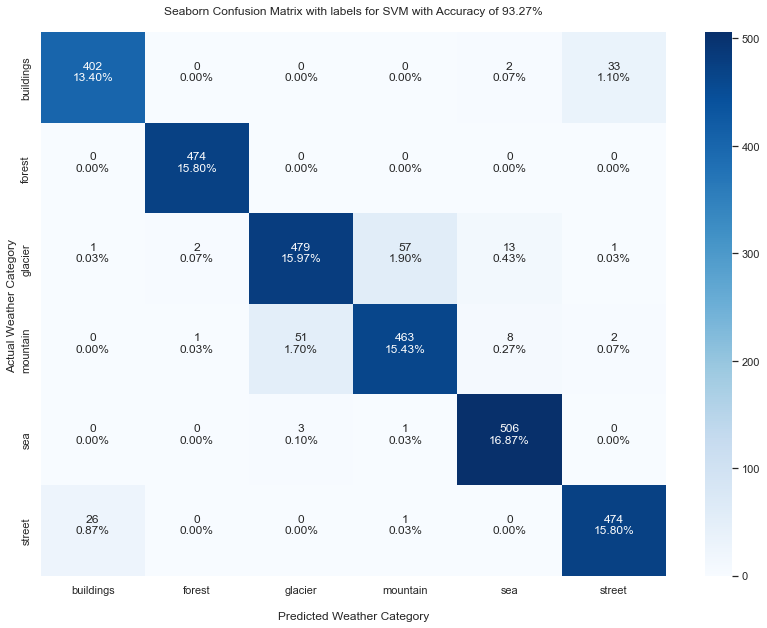

In [19]:
import seaborn as sns
sns.set(rc={'figure.figsize':(14,10)})
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
lab = [f"{v1}\n{v2}\n" for v1, v2 in zip(group_counts,group_percentages)]
n=len(categories)
lab = np.asarray(lab).reshape(n,n)
ax = sns.heatmap(cm, annot=lab, fmt='', cmap='Blues')
ax.set_title(f'Seaborn Confusion Matrix with labels for SVM with Accuracy of {accuracy1*100:.02f}%\n');
ax.set_xlabel('\nPredicted Weather Category')
ax.set_ylabel('Actual Weather Category ');
## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(categories)
ax.yaxis.set_ticklabels(categories)
## Display the visualization of the Confusion Matrix.
plt.show()

In [4]:
plt.figure(figsize=(10,10))
plt.show()

<Figure size 720x720 with 0 Axes>

In [5]:
plt

<module 'matplotlib.pyplot' from 'C:\\Users\\vgane\\AppData\\Roaming\\Python\\Python38\\site-packages\\matplotlib\\pyplot.py'>